# Прогнозирование оттока клиента Банка

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

    
Нам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.

**Цель исследования**:

Спрогнозировать, уйдёт клиент из банка в ближайшее время или нет:

- Построить модель с предельно большим значением F1-меры: нужно довести метрику до 0.59. Проверить F1-меру на тестовой выборке самостоятельно.

- Дополнительно измерить AUC-ROC, сравнивайте её значение с F1-мерой.

Признаки:
- `RowNumber` — индекс строки в данных
- `CustomerId` — уникальный идентификатор клиента
- `Surname` — фамилия
- `CreditScore` — кредитный рейтинг
- `Geography` — страна проживания
- `Gender` — пол
- `Age` — возраст
- `Tenure` — сколько лет человек является клиентом банка
- `Balance` — баланс на счёте
- `NumOfProducts` — количество продуктов банка, используемых клиентом
- `HasCrCard` — наличие кредитной карты
- `IsActiveMember` — активность клиента
- `EstimatedSalary` — предполагаемая зарплата

Целевой признак:
- `Exited` — факт ухода клиента

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Открытие-данных" data-toc-modified-id="Открытие-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Открытие данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Удаляем-лишние-столбцы" data-toc-modified-id="Удаляем-лишние-столбцы-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Удаляем лишние столбцы</a></span></li><li><span><a href="#Обработка-дубликатов" data-toc-modified-id="Обработка-дубликатов-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обработка дубликатов</a></span></li><li><span><a href="#Обработка-пропущенных-значений" data-toc-modified-id="Обработка-пропущенных-значений-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Обработка пропущенных значений</a></span></li><li><span><a href="#Кодирование-категориальных-признаков" data-toc-modified-id="Кодирование-категориальных-признаков-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Кодирование категориальных признаков</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Баланс-классов" data-toc-modified-id="Баланс-классов-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Баланс классов</a></span></li><li><span><a href="#Разделение-данных" data-toc-modified-id="Разделение-данных-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Разделение данных</a></span></li><li><span><a href="#Масштабирование-признаков" data-toc-modified-id="Масштабирование-признаков-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Масштабирование признаков</a></span></li><li><span><a href="#Обучение-базовой-модели-RandomForestClassifier" data-toc-modified-id="Обучение-базовой-модели-RandomForestClassifier-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Обучение базовой модели RandomForestClassifier</a></span><ul class="toc-item"><li><span><a href="#Важность-признаков" data-toc-modified-id="Важность-признаков-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Важность признаков</a></span></li><li><span><a href="#Главные-компоненты" data-toc-modified-id="Главные-компоненты-4.4.2"><span class="toc-item-num">4.4.2&nbsp;&nbsp;</span>Главные компоненты</a></span></li></ul></li><li><span><a href="#Обучение-базовой-модели-CatBoostClassifier" data-toc-modified-id="Обучение-базовой-модели-CatBoostClassifier-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Обучение базовой модели CatBoostClassifier</a></span><ul class="toc-item"><li><span><a href="#Важность-признаков" data-toc-modified-id="Важность-признаков-4.5.1"><span class="toc-item-num">4.5.1&nbsp;&nbsp;</span>Важность признаков</a></span></li></ul></li><li><span><a href="#Сравнение-важностей" data-toc-modified-id="Сравнение-важностей-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Сравнение важностей</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Случайный лес</a></span><ul class="toc-item"><li><span><a href="#Оптимизация-гиперпараметров:-раунд-1" data-toc-modified-id="Оптимизация-гиперпараметров:-раунд-1-4.7.1"><span class="toc-item-num">4.7.1&nbsp;&nbsp;</span>Оптимизация гиперпараметров: раунд 1</a></span></li><li><span><a href="#Оптимизация-гиперпараметров:-раунд-2" data-toc-modified-id="Оптимизация-гиперпараметров:-раунд-2-4.7.2"><span class="toc-item-num">4.7.2&nbsp;&nbsp;</span>Оптимизация гиперпараметров: раунд 2</a></span></li></ul></li><li><span><a href="#Тест-моделей-на-несбалансированной-обучающей-выборке" data-toc-modified-id="Тест-моделей-на-несбалансированной-обучающей-выборке-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>Тест моделей на несбалансированной обучающей выборке</a></span></li><li><span><a href="#Проверка-качества-модели-на-валидационной-выборке" data-toc-modified-id="Проверка-качества-модели-на-валидационной-выборке-4.9"><span class="toc-item-num">4.9&nbsp;&nbsp;</span>Проверка качества модели на валидационной выборке</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#NEARMISS" data-toc-modified-id="NEARMISS-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>NEARMISS</a></span></li><li><span><a href="#SMOTE" data-toc-modified-id="SMOTE-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>SMOTE</a></span></li><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Порог-классификации" data-toc-modified-id="Порог-классификации-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Порог классификации</a></span><ul class="toc-item"><li><span><a href="#Посмотрим-на-пороги-классификации-в-кросс-валидации" data-toc-modified-id="Посмотрим-на-пороги-классификации-в-кросс-валидации-5.4.1"><span class="toc-item-num">5.4.1&nbsp;&nbsp;</span>Посмотрим на пороги классификации в кросс-валидации</a></span></li></ul></li><li><span><a href="#Выбор-лучшей-модели" data-toc-modified-id="Выбор-лучшей-модели-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Выбор лучшей модели</a></span></li></ul></li><li><span><a href="#Тестирование-лучшей-модели-на-тестовых-данных" data-toc-modified-id="Тестирование-лучшей-модели-на-тестовых-данных-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Тестирование лучшей модели на тестовых данных</a></span><ul class="toc-item"><li><span><a href="#1-место:-CatBoostClassifier-с-SMOTE" data-toc-modified-id="1-место:-CatBoostClassifier-с-SMOTE-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>1 место: CatBoostClassifier с SMOTE</a></span></li><li><span><a href="#2-место-RandomForestClassifier-с-порогом-0.31" data-toc-modified-id="2-место-RandomForestClassifier-с-порогом-0.31-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>2 место RandomForestClassifier с порогом 0.31</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

## Открытие данных

Импортируем библиотеки:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os.path
import pandas as pd
import seaborn as sns

from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

Настроим вывод для вещественных чисел:

In [2]:
pd.options.display.float_format = '{:,.4f}'.format

In [3]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
pd.options.mode.chained_assignment = None

Прочитаем файл `Churn.csv` из папки `datasets` и сохраним его в переменной `df`:

In [5]:
try:
    if os.path.exists('datasets/Churn.csv'):
        df = pd.read_csv('datasets/Churn.csv')
        print('Прочитали файл datasets/Churn.csv')
    else:
        df = pd.read_csv('/datasets/Churn.csv')
        print('Прочитали файл с /datasets/Churn.csv')
except:
    print('У нас проблема')

Прочитали файл datasets/Churn.csv


Выведем на экран случайные 5 строк таблицы `df`:

In [6]:
df.sample(5).T

,451,5907,5085,7143,9005
RowNumber,452,5908,5086,7144,9006
CustomerId,15785798,15813862,15687372,15761158,15802823
Surname,Uchechukwu,Yevseyev,Padovesi,Y?an,Maclean
CreditScore,850,526,547,719,745
Geography,France,Spain,Germany,France,Spain
Gender,Male,Male,Male,Female,Female
Age,40,66,49,54,38
Tenure,9.0000,NaN,8.0000,7.0000,7.0000
Balance,0.0000,"132,044.6000","121,537.7100",0.0000,0.0000
NumOfProducts,2,2,2,2,2


Получим общую информацию о таблице:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Итак, в таблице 14 колонок, 10000 строк. Тип данных в столбцах: `object`, `float64`, `int64`.

**Описание данных**

Признаки:
- `RowNumber` — индекс строки в данных
- `CustomerId` — уникальный идентификатор клиента
- `Surname` — фамилия
- `CreditScore` — кредитный рейтинг
- `Geography` — страна проживания
- `Gender` — пол
- `Age` — возраст
- `Tenure` — сколько лет человек является клиентом банка
- `Balance` — баланс на счёте
- `NumOfProducts` — количество продуктов банка, используемых клиентом
- `HasCrCard` — наличие кредитной карты
- `IsActiveMember` — активность клиента
- `EstimatedSalary` — предполагаемая зарплата

Целевой признак:
- `Exited` — факт ухода клиента

Посмотрим на количество уникальных значений по колонкам:

In [8]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

Бинарные признаки `Gender`, `HasCrCard`, `IsActiveMember`, `Exited`

Оценим столбцы с числовым типом данных: посмотрим на статистические данные, которые дают представление о распределении значений:

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,"10,000.0000","5,000.5000","2,886.8957",1.0000,"2,500.7500","5,000.5000","7,500.2500","10,000.0000"
CustomerId,"10,000.0000","15,690,940.5694","71,936.1861","15,565,701.0000","15,628,528.2500","15,690,738.0000","15,753,233.7500","15,815,690.0000"
CreditScore,"10,000.0000",650.5288,96.6533,350.0000,584.0000,652.0000,718.0000,850.0000
Age,"10,000.0000",38.9218,10.4878,18.0000,32.0000,37.0000,44.0000,92.0000
Tenure,"9,091.0000",4.9977,2.8947,0.0000,2.0000,5.0000,7.0000,10.0000
Balance,"10,000.0000","76,485.8893","62,397.4052",0.0000,0.0000,"97,198.5400","127,644.2400","250,898.0900"
NumOfProducts,"10,000.0000",1.5302,0.5817,1.0000,1.0000,1.0000,2.0000,4.0000
HasCrCard,"10,000.0000",0.7055,0.4558,0.0000,0.0000,1.0000,1.0000,1.0000
IsActiveMember,"10,000.0000",0.5151,0.4998,0.0000,0.0000,1.0000,1.0000,1.0000
EstimatedSalary,"10,000.0000","100,090.2399","57,510.4928",11.5800,"51,002.1100","100,193.9150","149,388.2475","199,992.4800"


Пропущенные значения есть только в колонке `Tenure`. Количество пропущенных значений:

In [10]:
df.Tenure.isna().sum()

909

In [11]:
object_features = list(df.loc[:, df.dtypes == 'object'].columns.values)
print(object_features)

['Surname', 'Geography', 'Gender']


Построим тепловую матрицу корреляций:

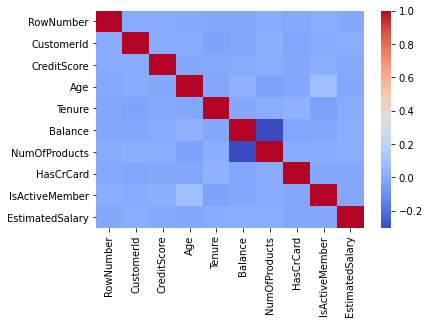

In [12]:
sns.heatmap(df.drop(columns=['Exited']).corr(),cmap='coolwarm',annot=False)
plt.show()

Видим, что сильной корреляции признаков нет

**Вывод:**

- в таблице 14 колонок, 10000 строк.
- Столбцы `RowNumber`, `CustomerId` и `Surname` не понадобятся для проведения моделирования оттока клиентов. Их можно исключить из датасета.
- в колонке `Tenure` 909 пропущенных значений. Заполнение таких данных нулями или средними значениями приведет к искажению данных и неправильной работе модели, поэтому их необходимо исключить из датасета.
- cтолбцы `Geography` и `Gender` имеют тип данных `object`, для осуществления дальнейшего моделирования применим к ним кодирование данных.
- Анализ численных данных показал, что практически во всех случаях среднее значение близко к медиане, что говорит об отсутствии существенных выбросов в данных. Исключением является столбец Balance, у него имеются значительные выбросы. Оценим этот столбец подробнее.

## Предобработка данных

### Удаляем лишние столбцы

Колонки, которые не пригодятся нам:

In [13]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname', ], inplace=True)
print(df.shape)

(10000, 11)


### Обработка дубликатов

In [14]:
df.duplicated().sum()

0

Явных дубликатов в таблице нет

### Обработка пропущенных значений

Удалим пропущенные значения:

In [15]:
df.dropna(inplace=True)
print(df.shape)

(9091, 11)


### Кодирование категориальных признаков

Выполним кодирование признака `Gender` с помощью словаря

In [16]:
df['Gender'].replace({'Male': 1, 'Female':0}, inplace=True)

In [17]:
df['Gender'].value_counts()

1    4974
0    4117
Name: Gender, dtype: int64

Определим список категориальных признаков `category`

In [18]:
category = ['Geography']

Будем использовать быстрое кодирование `One Hot Encoding` с помощью `get_dummies`:

`drop_first = True` используется, чтобы избежать ловушки переменных, которая также называется мультиколлинеарностью, когда одна переменная предсказывает значение других

In [19]:
df = pd.get_dummies(data=df, columns=category, drop_first=True)

Посмотрим на результат:

In [20]:
df[[column for column in df.columns if 'Geography' in column] + ['Gender']].sample(3)

,Geography_Germany,Geography_Spain,Gender
8489,0,0,0
2447,0,0,1
1706,0,1,1


## Анализ данных

Напишем функцию `histplot_boxplot` для вывода на экран распределения признака и ящика с усами

In [21]:
def histplot_boxplot(column, bins=50, kde=True):
    """
    
    column - название колонки для построения распределения
    bins - количество корзин (50 по умолчанию)
    
    """
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.2, .7)}, figsize=(10, 9))
    sns.boxplot(data=df, 
                x=column, 
                y='Exited', 
                orient='h',
                order=[1,0],
                palette='husl',
                ax=ax_box)
    sns.histplot(data=df, 
                 x=column, 
                 hue='Exited', 
                 bins=bins, 
                 kde=kde, 
                 palette='husl', 
                 stat='probability', 
                 hue_order=[1,0],
                 ax=ax_hist)
 
    ax_box.set(xlabel='')
    ax_box.set(title='Ящик с усами для "{}"'.format(column))
    ax_hist.set(title='Распределение признака "{}" в разрезе целевого признака'.format(column))
    plt.show()

Посмотрим на признак `Balance`

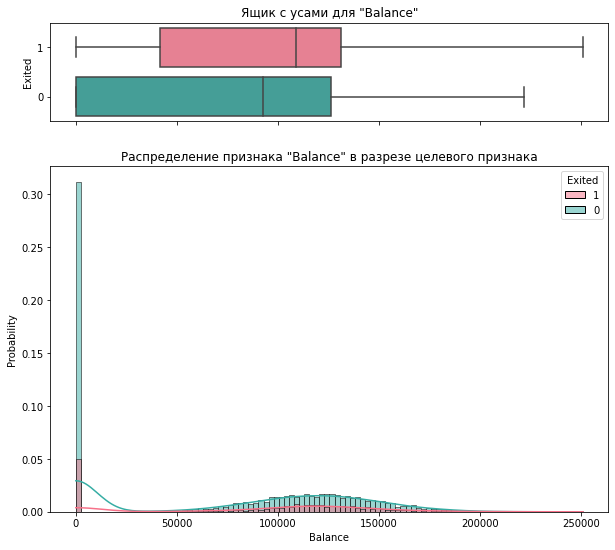

In [22]:
histplot_boxplot('Balance', 100)

Не считая пика у нуля, обе гистограммы имеют нормальное распределение, при этом диаграммы размаха показывают, что выбросы для обоих гистограмм отсутствуют. Так как клиенты с нулевым балансом представляют значительную часть выборки, то они должны быть оставлены в датасете, таким образом предобработка данного столбца не требуется

## Исследование задачи

Подготовим входные признаки `x` и целевой признак `y`:

In [23]:
y = df['Exited']

In [24]:
x = df.drop(columns=['Exited'])

### Баланс классов

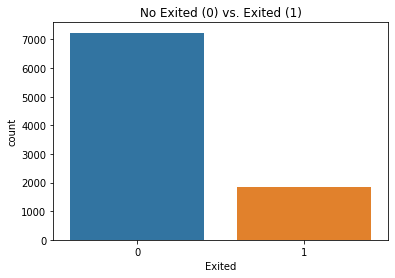

In [25]:
sns.countplot(data = df, x='Exited')
plt.title('No Exited (0) vs. Exited (1)')
plt.show()

In [26]:
y.value_counts(normalize=True).map('{:.2%}'.format)

0    79.61%
1    20.39%
Name: Exited, dtype: object

Классы неслабансированы: соотношение 4 к 1

Если создать константную модель, которая всегда предсказывает 0 (ни один клиент не уйдет), то ее `accuracy` будет равно  0.8. Видим, что значение достаточно высоко и модель нужно строить с учетом дисбаланса классов. Изначально построим модели без учета дисбаланса классов

### Разделение данных

Зафиксируем параметр псевдослучайности для наших моделей и выборок:

In [27]:
rnd_st = 12345

Разделим исходные данные на обучающую `train` и тестовую выборки `test` в пропорциях 4:1

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rnd_st, stratify=y)

In [29]:
print(y_train.value_counts(normalize=True).map('{:.2%}'.format))
print(y_test.value_counts(normalize=True).map('{:.2%}'.format))
print(y_train.shape)
print(y_test.shape)

0    79.61%
1    20.39%
Name: Exited, dtype: object
0    79.60%
1    20.40%
Name: Exited, dtype: object
(7272,)
(1819,)


### Масштабирование признаков

Определим список признаков `numeric` для масштабирования (бинарные признаки не масштабируем):

In [30]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
display(x_train.describe().iloc[:3, :].T)
display(x_test.describe().iloc[:3, :].T)

,count,mean,std
CreditScore,"7,272.0000",650.8501,96.2803
Gender,"7,272.0000",0.5435,0.4981
Age,"7,272.0000",38.9524,10.5897
Tenure,"7,272.0000",4.9986,2.9024
Balance,"7,272.0000","76,200.7962","62,345.2988"
NumOfProducts,"7,272.0000",1.5336,0.5847
HasCrCard,"7,272.0000",0.7050,0.4561
IsActiveMember,"7,272.0000",0.5188,0.4997
EstimatedSalary,"7,272.0000","99,597.2045","57,501.9232"
Geography_Germany,"7,272.0000",0.2499,0.4330


,count,mean,std
CreditScore,"1,819.0000",650.2826,96.9545
Gender,"1,819.0000",0.5618,0.4963
Age,"1,819.0000",38.9362,10.4210
Tenure,"1,819.0000",4.9940,2.8647
Balance,"1,819.0000","77,809.8072","62,266.9378"
NumOfProducts,"1,819.0000",1.5168,0.5659
HasCrCard,"1,819.0000",0.7048,0.4563
IsActiveMember,"1,819.0000",0.5025,0.5001
EstimatedSalary,"1,819.0000","102,515.9726","58,070.4574"
Geography_Germany,"1,819.0000",0.2617,0.4397


Приведём признаки к одному масштабу с помощью стандартизации данных (z-преобразование)

Настроим `scaler` на обучающей выборке:

In [31]:
scaler = StandardScaler()
scaler.fit(x_train[numeric])

StandardScaler()

Преобразуем выборки методом `transform`:

In [32]:
x_train[numeric] = scaler.transform(x_train[numeric])
x_test[numeric] = scaler.transform(x_test[numeric])

Посмотрим на выборки после масштабирования:

In [33]:
display(x_train.describe().iloc[:3, :].T)
display(x_test.describe().iloc[:3, :].T)

,count,mean,std
CreditScore,"7,272.0000",-0.0000,1.0001
Gender,"7,272.0000",0.5435,0.4981
Age,"7,272.0000",-0.0000,1.0001
Tenure,"7,272.0000",-0.0000,1.0001
Balance,"7,272.0000",0.0000,1.0001
NumOfProducts,"7,272.0000",-0.0000,1.0001
HasCrCard,"7,272.0000",0.7050,0.4561
IsActiveMember,"7,272.0000",0.5188,0.4997
EstimatedSalary,"7,272.0000",0.0000,1.0001
Geography_Germany,"7,272.0000",0.2499,0.4330


,count,mean,std
CreditScore,"1,819.0000",-0.0059,1.0071
Gender,"1,819.0000",0.5618,0.4963
Age,"1,819.0000",-0.0015,0.9841
Tenure,"1,819.0000",-0.0016,0.9871
Balance,"1,819.0000",0.0258,0.9988
NumOfProducts,"1,819.0000",-0.0287,0.9679
HasCrCard,"1,819.0000",0.7048,0.4563
IsActiveMember,"1,819.0000",0.5025,0.5001
EstimatedSalary,"1,819.0000",0.0508,1.0100
Geography_Germany,"1,819.0000",0.2617,0.4397


### Обучение базовой модели RandomForestClassifier

Cоздадим модель №1 алгоритм `RandomForest` с использованием значений гиперпараметров, задаваемых по умолчанию:
- инициализируем модель
- обучаем её на масштабированной обучающей выборке
- f1 модели измеряем на тестовой выборке

Но для начала разделим обучающую выборку на `обучающую`(`train_research`) и `валидационную`(`valid_research`): полученные выборки будем использовать только в оценке качества моделей: для подбора гиперпараметров используется поиск по решетке на обучающей выборке `train`

In [34]:
x_train_research, x_valid_research, y_train_research, y_valid_research = train_test_split(x_train, 
                                                                                          y_train, 
                                                                                          test_size=0.25,
                                                                                          stratify=y_train,
                                                                                          random_state=rnd_st)

In [35]:
print(x_train_research.shape, x_valid_research.shape, x_test.shape)
print(y_train_research.shape, y_valid_research.shape, y_test.shape)

(5454, 11) (1818, 11) (1819, 11)
(5454,) (1818,) (1819,)


In [36]:
base_model_rfc = RandomForestClassifier(random_state=rnd_st)
base_model_rfc.fit(x_train_research, y_train_research)
y_pred_research = base_model_rfc.predict(x_valid_research)
f1 = f1_score(y_valid_research, y_pred_research)
print('RandomForest базовая модель f1 =','{:.4f}'.format(f1))

RandomForest базовая модель f1 = 0.5611


#### Важность признаков

Посмотрим какие признаки являются самыми важными для RF-модели в деле предсказания

Визуализируем и квантифицируем показатели важности признаков, обратившись к атрибуту `feature_importances_`:

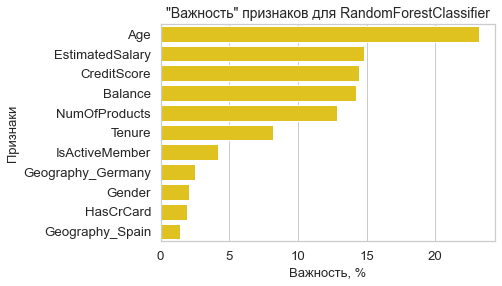

,Features,Gini-Importance
0,Age,23.2198
1,EstimatedSalary,14.8380
2,CreditScore,14.4479
3,Balance,14.2621
4,NumOfProducts,12.8519
5,Tenure,8.2063
6,IsActiveMember,4.2066
7,Geography_Germany,2.5346
8,Gender,2.0735
9,HasCrCard,1.9493


In [37]:
feats = {}
for feature, importance in zip(x_train.columns, 100*base_model_rfc.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(style="whitegrid", color_codes=True, font_scale = 1.2)
fig, ax = plt.subplots(figsize=(6,4))
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='gold')
plt.xlabel('Важность, %', fontsize=13)
plt.ylabel('Признаки', fontsize=13)
plt.title('"Важность" признаков для RandomForestClassifier', fontsize=14)
plt.show()
display(importances)

#### Главные компоненты

Зададимся вопросом о том, как можно улучшить базовую RF-модель. 

С использованием методики снижения размерности пространства признаков `PCA` можно представить исходный набор данных через меньшее количество переменных и при этом снизить объём вычислительных ресурсов, необходимых для обеспечения работы модели. Используя `PCA`, можно изучить кумулятивную выборочную дисперсию этих признаков для того чтобы понять то, какие признаки объясняют большую часть дисперсии в данных.

Инициализируем объект `pca`, указывая количество компонент (признаков), которые нужно рассмотреть. Мы устанавливаем этот показатель в `11` для того чтобы увидеть объяснённую дисперсию всех сгенерированных компонент до того, как примем решение о том, сколько компонент нам понадобится. Затем передаём в `pca` масштабированные данные `x_train`, пользуясь методом `fit()`. После этого визуализируем данные

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.1857,0.1857
1,0.3301,0.1444
2,0.4716,0.1415
3,0.6113,0.1397
4,0.7506,0.1393
5,0.8548,0.1042
6,0.8907,0.0359
7,0.9247,0.0340
8,0.9551,0.0304
9,0.9839,0.0288


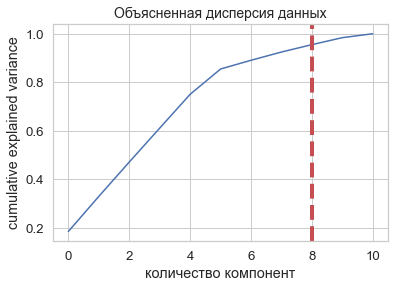

In [38]:
#Cumulative Variance Ratio (кумулятивный размер объяснённой дисперсии данных)
#Explained Variance Ratio (вклад каждой компоненты в общий объём объяснённой дисперсии)
pca = PCA(n_components=11)
pca.fit(x_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('количество компонент')
plt.ylabel('cumulative explained variance')
plt.title('Объясненная дисперсия данных', fontsize=14)
plt.axvline(linewidth=4, color='r', linestyle = '--', x=8, ymin=0, ymax=1)
evr = pca.explained_variance_ratio_
cvr = np.cumsum(pca.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(11))

Видим, что 9 компонент на 95% объясняют дисперсию данных. Число компонент уменьшать не будем

### Обучение базовой модели CatBoostClassifier

Посмотрим на базовую модель Градиентный бустинг с CATBOOST

In [39]:
base_model_cbc = CatBoostClassifier(random_state=rnd_st, verbose=False)
base_model_cbc.fit(x_train_research, y_train_research)
y_pred_research = base_model_cbc.predict(x_valid_research)
f1 = f1_score(y_valid_research, y_pred_research)
print('CatBoostClassifier базовая модель f1 =','{:.4f}'.format(f1))

CatBoostClassifier базовая модель f1 = 0.5990


#### Важность признаков

Посмотрим какие признаки являются самыми важными для CatBoost-модели в деле предсказания

Визуализируем и квантифицируем показатели важности признаков, обратившись к атрибуту `feature_importances_`:

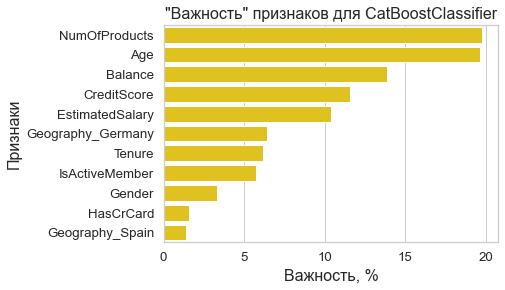

,Features,Gini-Importance
0,NumOfProducts,19.8043
1,Age,19.6677
2,Balance,13.8878
3,CreditScore,11.5799
4,EstimatedSalary,10.4138
5,Geography_Germany,6.4466
6,Tenure,6.1951
7,IsActiveMember,5.7283
8,Gender,3.3428
9,HasCrCard,1.5576


In [40]:
feats = {}
for feature, importance in zip(x_train.columns, base_model_cbc.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(style="whitegrid", color_codes=True, font_scale = 1.2)
fig, ax = plt.subplots(figsize=(6,4))
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='gold')
plt.xlabel('Важность, %', fontsize=16)
plt.ylabel('Признаки', fontsize=16)
plt.title('"Важность" признаков для CatBoostClassifier', fontsize=16)
plt.show()
display(importances)

### Сравнение важностей

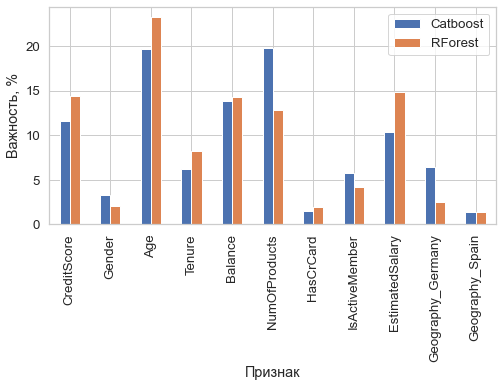

In [41]:
importances_compare = pd.DataFrame({'Catboost' : base_model_cbc.get_feature_importance(),
                                    'RForest'  : 100*base_model_rfc.feature_importances_},
                                   index=x_train.columns)

fig, ax = plt.subplots(figsize=(8,4))
ax = importances_compare.plot.bar(ax=ax)
ax.set_xlabel('Признак')
ax.set_ylabel('Важность, %')
plt.show()

У каждой модели свои "важные" признаки

### Случайный лес

#### Оптимизация гиперпараметров: раунд 1

Воспользуемся оптимизацией гиперпараметров модели для того чтобы улучшить качество предсказаний, выдаваемых RF-моделью. Начнем с алгоритма `RandomizedSearchCV`, который позволяет довольно грубо исследовать широкие диапазоны значений:
- генерируем словарь `param_dist`, содержащий для каждого гиперпараметра диапазон значений, которые нужно испытать
- инициализируем объект `rs` с помощью функции `RandomizedSearchCV()`, передавая ей `RF-модель`, `param_dist`, число итераций и число кросс-валидаций, которые нужно выполнить.

Мы будем заниматься подбором следующих гиперпараметров:
- `n_estimators` — число «деревьев» в «случайном лесу».
- `max_features` — число признаков для выбора расщепления.
- `max_depth` — максимальная глубина деревьев.
- `min_samples_split` — минимальное число объектов, необходимое для того, чтобы узел дерева мог бы расщепиться.
- `min_samples_leaf` — минимальное число объектов в листьях.
- `bootstrap` — использование для построения деревьев подвыборки с возвращением.

In [42]:
%%time

param_dist = {
    'n_estimators': range(100, 1100, 200),
    'max_features': ['log2', 'sqrt'],
    'max_depth': range(2, 11, 2)
}

rs = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=rnd_st),  
    param_distributions=param_dist, 
    n_iter=50, 
    cv=5, 
    n_jobs=-1, 
    random_state=rnd_st,
    scoring='f1'
)
rs.fit(x_train, y_train)
rs.best_params_

CPU times: user 1.26 s, sys: 265 ms, total: 1.53 s
Wall time: 54.8 s


{'n_estimators': 100, 'max_features': 'log2', 'max_depth': 10}

При значениях параметров `n_iter` = 50 и `cv` = 5, мы создали 250 RF-моделей, случайно выбирая комбинации представленных выше гиперпараметров. Мы можем обратиться к атрибуту `best_params_` для получения сведений о наборе параметров, позволяющем создать самую лучшую модель. Но на данной стадии это может не дать нам наиболее интересных данных о диапазонах параметров, которые стоит изучить на следующем раунде оптимизации. Для того чтобы выяснить то, в каком диапазоне значений стоит продолжать поиск, получим датафрейм, содержащий результаты работы алгоритма `RandomizedSearchCV`.

In [43]:
rs_df = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_df = rs_df.drop([
    'mean_fit_time', 
    'std_fit_time', 
    'mean_score_time',
    'std_score_time', 
    'params', 
    'split0_test_score', 
    'split1_test_score', 
    'split2_test_score', 
    'split3_test_score', 
    'split4_test_score', 
    'std_test_score'],
    axis=1)
rs_df.head(10).T

,0,1,2,3,4,5,6,7,8,9
param_n_estimators,100,100,900,900,700,700,300,300,500,500
param_max_features,log2,sqrt,sqrt,log2,log2,sqrt,log2,sqrt,log2,sqrt
param_max_depth,10,10,10,10,10,10,10,10,10,10
mean_test_score,0.5670,0.5670,0.5659,0.5659,0.5654,0.5654,0.5642,0.5642,0.5635,0.5635
rank_test_score,1,1,3,3,5,5,7,7,9,9


Теперь создадим столбчатые графики, на которых, по оси Х, расположены значения гиперпараметров, а по оси Y — средние значения, показываемые моделями. Это позволит понять то, какие значения гиперпараметров, в среднем, лучше всего себя показывают.

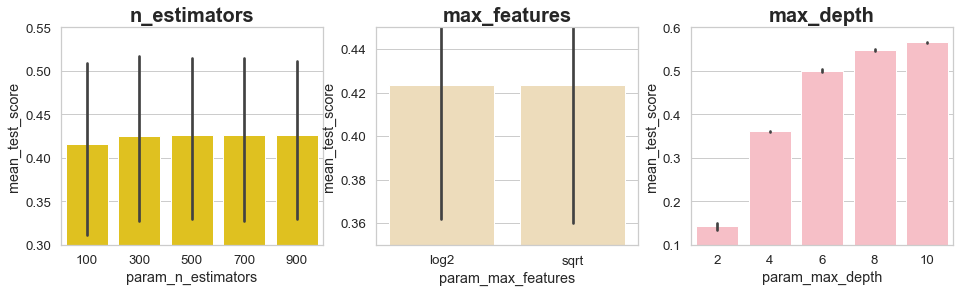

In [44]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16,4))
sns.set(style="whitegrid", color_codes=True, font_scale = 1)
sns.barplot(x='param_n_estimators', y='mean_test_score', data=rs_df, ax=axs[0], color='gold')
axs[0].set_ylim([.3,.55])
axs[0].set_title(label = 'n_estimators', size=20, weight='bold')
sns.barplot(x='param_max_features', y='mean_test_score', data=rs_df, ax=axs[1], color='wheat')
axs[1].set_ylim([.35,.45])
axs[1].set_title(label = 'max_features', size=20, weight='bold')
sns.barplot(x='param_max_depth', y='mean_test_score', data=rs_df, ax=axs[2], color='lightpink')
axs[2].set_ylim([.1,.6])
axs[2].set_title(label = 'max_depth', size=20, weight='bold')
plt.show()

Анализ значений гиперпараметров:
- `n_estimators`: значения 100, 300, 500, видимо, показывают наилучшие средние результаты.
- `max_features`: варианты `log2` и `sqrt` дают приблизительно одинаковые результаты.
- `max_depth`: чёткая зависимость между значением гиперпараметра и результатом работы: берем `10`.

#### Оптимизация гиперпараметров: раунд 2

После применения алгоритма `RandomizedSearchCV` воспользуемся алгоритмом `GridSearchCV` для проведения более точного поиска наилучшей комбинации гиперпараметров. 

Здесь исследуются те же гиперпараметры, но теперь мы применяем более «обстоятельный» поиск их наилучшей комбинации.

При использовании алгоритма `GridSearchCV` исследуется каждая комбинация гиперпараметров. Это требует гораздо больших вычислительных ресурсов, чем использование алгоритма `RandomizedSearchCV`, когда мы самостоятельно задаём число итераций поиска.

In [45]:
%%time

param_grid = { 
    'n_estimators': range(700, 900, 50),
    'max_depth': [10],
    'max_features': ['log2', 'sqrt']
}
gs_rfc = GridSearchCV(estimator=RandomForestClassifier(random_state=rnd_st), 
                      param_grid=param_grid, 
                      cv=5, 
                      n_jobs=8, 
                      scoring='f1')
gs_rfc.fit(x_train, y_train)
print('RandomForest GridSearch наилучшие параметры:', gs_rfc.best_params_)
print('RandomForest GridSearch наибольший f1={:.4f}'.format(gs_rfc.best_score_))

RandomForest GridSearch наилучшие параметры: {'max_depth': 10, 'max_features': 'log2', 'n_estimators': 800}
RandomForest GridSearch наибольший f1=0.5682
CPU times: user 3.73 s, sys: 100 ms, total: 3.83 s
Wall time: 27 s


### Тест моделей на несбалансированной обучающей выборке

Напишем функцию `cv_func`для кросс-валидации:

In [46]:
def cv_func(models, x, y, comment_rus, comment_eng):
    """
    models - список моделей
    x - входные признаки
    y - целевой признак
    comment_rus - дополнительный комментарий в заголовок графика
    comment_eng - добавка в название колонки датафрейма с моделями и значениями f1
    
    """
    cv = 5
    cv_df = pd.DataFrame(index=range(cv*len(models)))
    entries = []
    for model in tqdm(models):
        model_name = model.__class__.__name__
        f1_scores = cross_val_score(model, x, y, scoring='f1', cv=cv, verbose=0)
        for fold_idx, f1 in enumerate(f1_scores):
            entries.append((model_name, fold_idx, f1))
            cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'f1'])

    plt.figure(figsize=(8, 4))        
    sns.boxplot(x='model_name', y='f1', data=cv_df)
    sns.stripplot(x='model_name', y='f1', data=cv_df, 
                  size=8, jitter=True, edgecolor="gray", linewidth=2)
    plt.title('Ящики с усами для f1 на кросс-валидации {}'.format(comment_rus), fontsize=14)
    plt.show()
    cv_df_group = (
        cv_df
        .groupby('model_name')
        .agg({'f1': 'median'})
        .sort_values(by='f1', ascending=False)
    )
    cv_df_group = cv_df_group.rename(columns={'f1': 'f1_'+ comment_eng})
    return cv_df_group

Определим список моделей для кроссвалидации:

In [47]:
models_imbalanced = [
    RandomForestClassifier(
        random_state=rnd_st, 
        max_depth=10, 
        n_estimators=800),
    LogisticRegression(
        random_state=rnd_st),
    CatBoostClassifier(
        random_state=rnd_st, 
        depth=7, 
        learning_rate=0.3, 
        iterations=63,
        silent=True)
]

Выполним кросс-валидацию на обучающей выборке с 5 фолдами для подобранных гиперпараметров.

100%|██████████| 3/3 [00:16<00:00,  5.58s/it]


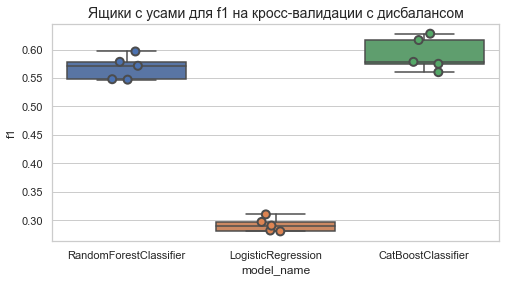

In [48]:
cv_df_imbalanced = cv_func(models_imbalanced, x_train, y_train, 'c дисбалансом', 'imbalanced')

In [49]:
cv_df_imbalanced

,f1_imbalanced
model_name,
CatBoostClassifier,0.5783
RandomForestClassifier,0.5714
LogisticRegression,0.2907


**Вывод:**

Победитель CatBoostClassifier c f1 = 0.5783

### Проверка качества модели на валидационной выборке

Напишем функцию `roc_cm_plot` для построения `ROC-кривой`, матрицы ошибок и расчета `AUC-ROC`:

In [50]:
def roc_cm_plot(model, x, y, comment):
    """
    model - модель
    x - входные признаки
    y - целевой признак
    comment - дополнительный комментарий в заголовок графика
    
    """
    y_pred = model.predict(x)
    y_prob = model.predict_proba(x)
    y_prob_one = y_prob[:, 1]
    auc_roc = roc_auc_score(y, y_prob_one)
    print('{} {}:'.format(model.__class__.__name__, comment))
    print('\t - f1 = {:.4f}'.format(f1_score(y, y_pred)))
    print('\t - AUC-ROC = {:.4f}'.format(auc_roc))
    print('\t - accuracy = {:.4f}'.format(accuracy_score(y, y_pred)))
    fpr, tpr, thresholds = roc_curve(y, y_prob_one) 
    plt.figure(figsize=(5,2))
    plt.plot(fpr, tpr, linestyle='-', label='ROC-кривая')
    plt.plot([0, 1], [0, 1], linestyle='--', label='Константная модель')
    plt.ylim([0, 1])
    plt.xlim([0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая для {} {}'.format(model.__class__.__name__, comment))
    plt.legend(loc="lower right")
    
    plt.text(0.58, 0.48, 'AUC-ROC = {:.4f}'.format(auc_roc), 
             bbox={'facecolor': 'green', 'alpha': 0.3, 'pad': 5})
    plt.show()
    cm = confusion_matrix(y, y_pred)    
    plt.figure(figsize=(4,1))
    sns.heatmap(cm, annot=True, fmt='d', linewidths=3, cmap='YlGnBu', linecolor='black')
    plt.xlabel('Предсказания')
    plt.ylabel('Ответы')
    plt.title('Матрица ошибок')
    plt.show()

Построим ROC-кривую и матрицу ошибок для с дисбалансом классов

RandomForestClassifier с дисбалансом:
	 - f1 = 0.5628
	 - AUC-ROC = 0.8657
	 - accuracy = 0.8641


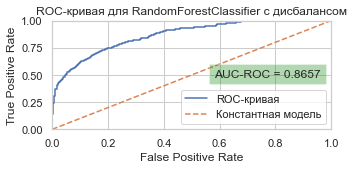

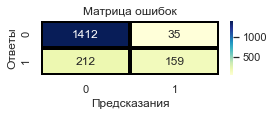

LogisticRegression с дисбалансом:
	 - f1 = 0.2828
	 - AUC-ROC = 0.7578
	 - accuracy = 0.8047


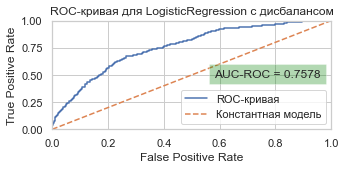

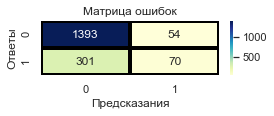

CatBoostClassifier с дисбалансом:
	 - f1 = 0.5790
	 - AUC-ROC = 0.8713
	 - accuracy = 0.8608


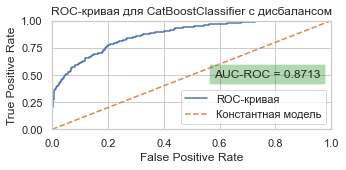

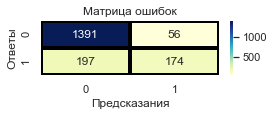

In [51]:
for model in models_imbalanced:
    model.fit(x_train_research, y_train_research)
    roc_cm_plot(model, x_valid_research, y_valid_research, 'с дисбалансом')

Напишем функцию `model_result` для добавления метрик в общую таблицу результатов:

In [52]:
def model_result(model, comment, x, y):
    """
    model - модель
    comment - дополнительный комментарий в таблицу
    x - входные признаки валидационная выборка
    y - целевой признак  валидационная выборка
    
    """
    y_pred = model.predict(x)
    y_prob = model.predict_proba(x)
    y_prob_one = y_prob[:, 1]
    auc_roc = roc_auc_score(y, y_prob_one)
    f1 = f1_score(y, y_pred)
    accuracy = accuracy_score(y, y_pred)
    results.loc[len(results)] = [model.__class__.__name__, comment, f1, auc_roc, accuracy]
    if len(results) > 0:
        results.drop_duplicates(inplace=True)
    return results

Cоздадим таблицу `results` для хранения результатов:

In [53]:
data = {'model': [], 'comment': [], 'f1': [], 'AUC-ROC': [], 'accuracy':[]}
results = pd.DataFrame(data=data)

Добавим первые результаты в общую таблицу

In [54]:
for model in models_imbalanced:
    model.fit(x_train_research, y_train_research)
    results = model_result(model, 'дисбаланс', x_valid_research, y_valid_research)
results

,model,comment,f1,AUC-ROC,accuracy
0,RandomForestClassifier,дисбаланс,0.5628,0.8657,0.8641
1,LogisticRegression,дисбаланс,0.2828,0.7578,0.8047
2,CatBoostClassifier,дисбаланс,0.5790,0.8713,0.8608


**Вывод**

Победитель на несбалансированной выборке: CatBoostClassifier

Несмотря на высокую долю правильных ответов (accuracy=0.8686), модель имеет низкое значение f1-меры, что обусловлено наличием большого количества ложноотрицательных ответов (FN). Ложноотрицательные ответы ведут к уменьшению полноты, которая негативно влияет на меру F1. Значение ROC-AUC попадает в интервал 0,8-0,9: качество модели хорошее

## Борьба с дисбалансом

### NEARMISS

Метод `NearMiss` из библиотеки `imblearn` стремится сбалансировать распределение классов путём случайного исключения наблюдений из бо́льших классов. Если экземпляры из двух разных классов очень похожи между собой, метод удаляет наблюдение из мажоритарного класса.

In [55]:
print('Перед применением метода True: {}'.format(sum(y_train_research == True)))
print('Перед применением метода False: {}'.format(sum(y_train_research == False)))

Перед применением метода True: 1112
Перед применением метода False: 4342


In [56]:
nm = NearMiss()
x_train_miss, y_train_miss = nm.fit_resample(x_train_research, y_train_research)

In [57]:
print('После применения метода True: {}'.format(sum(y_train_miss == True)))
print('После применения метода False: {}'.format(sum(y_train_miss == False)))

После применения метода True: 1112
После применения метода False: 1112


Выполним кросс-валидацию на обучающей выборке с 5 фолдами для подобранных гиперпараметров:

In [58]:
cbc_nearmiss = CatBoostClassifier(
    random_state=rnd_st, 
    silent=True, 
    depth=7, 
    learning_rate=0.3, 
    iterations=63
)
rfc_nearmiss = RandomForestClassifier(
    random_state=rnd_st, 
    max_depth=10, 
    n_estimators=800
)
lr_nearmiss = LogisticRegression(
    random_state=rnd_st
)
models_nearmiss = [cbc_nearmiss, rfc_nearmiss, lr_nearmiss]

100%|██████████| 3/3 [00:08<00:00,  2.72s/it]


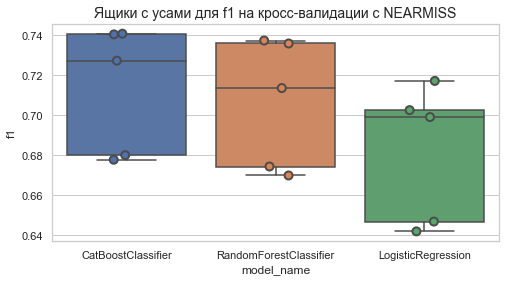

In [59]:
cv_df_nearmiss = cv_func(models_nearmiss, x_train_miss, y_train_miss, 'c NEARMISS', 'nearmiss')

In [60]:
cv_df_nearmiss

,f1_nearmiss
model_name,
CatBoostClassifier,0.7273
RandomForestClassifier,0.7136
LogisticRegression,0.6991


Посмотрим как ведут себя модели на валидационной выборке:

CatBoostClassifier c NearMiss:
	 - f1 = 0.4573
	 - AUC-ROC = 0.7455
	 - accuracy = 0.6502


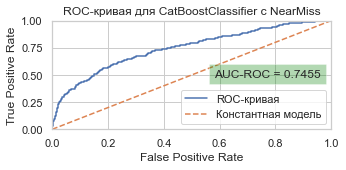

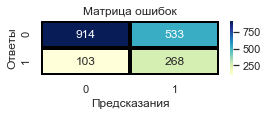

RandomForestClassifier c NearMiss:
	 - f1 = 0.4406
	 - AUC-ROC = 0.7267
	 - accuracy = 0.6480


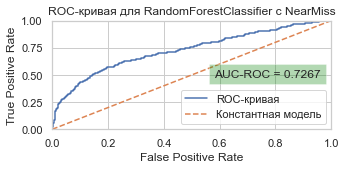

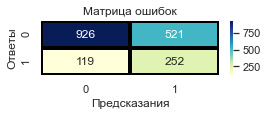

LogisticRegression c NearMiss:
	 - f1 = 0.4330
	 - AUC-ROC = 0.6925
	 - accuracy = 0.6370


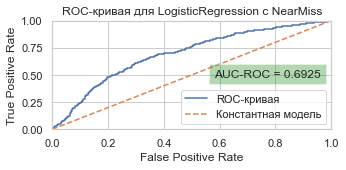

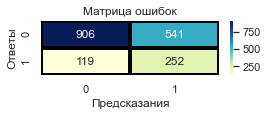

In [61]:
for model in models_nearmiss:
    model.fit(x_train_miss, y_train_miss)
    roc_cm_plot(model, x_valid_research, y_valid_research, 'c NearMiss')

Добавим результаты в общую таблицу

In [62]:
for model in models_nearmiss:
    model.fit(x_train_miss, y_train_miss)
    results = model_result(model, 'nearmiss', x_valid_research, y_valid_research)
results

,model,comment,f1,AUC-ROC,accuracy
0,RandomForestClassifier,дисбаланс,0.5628,0.8657,0.8641
1,LogisticRegression,дисбаланс,0.2828,0.7578,0.8047
2,CatBoostClassifier,дисбаланс,0.5790,0.8713,0.8608
3,CatBoostClassifier,nearmiss,0.4573,0.7455,0.6502
4,RandomForestClassifier,nearmiss,0.4406,0.7267,0.6480
5,LogisticRegression,nearmiss,0.4330,0.6925,0.6370


**Вывод:**

Видим падение метрики f1 ниже 0.5 из-за резкого увеличения ложноположительных предсказаний

### SMOTE

`SMOTE` (англ. Synthetic Minority Oversampling Technique) - техника, основанная на идее генерации некоторого количества искусственных объектов, которые были бы похожи на имеющиеся в миноритарном классе, но при этом не дублировали их: синтезируются объекты для класса меньшинства в непосредственной близости от уже существующих объектов.

Напишем функцию `smote_cv`, в которой на каждом фолде перекрестной проверки:
- делим данные на обучающую выборку и тренировочную выборку
- апсемплим меньший класс
- обучаем классификатор на тренировочных данных
- валидируем классификатор на оставшемся фолде

In [63]:
def smote_cv(model, x, y, n_splits=5):
    """
    models - список моделей
    x - входные признаки
    y - целевой признак
    n_splits - количество фолдов
    
    """
    model_name = model.__class__.__name__
    accuracy_scories = []
    auc_roc_scories = []
    f1_scories = []
    kf = KFold(n_splits=n_splits)
    for train_index, test_index in kf.split(x):
        x_train, x_test, y_train, y_test = (x.iloc[train_index], 
                                            x.iloc[test_index], 
                                            y.iloc[train_index], 
                                            y.iloc[test_index])
        oversample = SMOTE(random_state=rnd_st)
        x_train_smote, y_train_smote = oversample.fit_resample(x_train, y_train)
        model.fit(x_train_smote, y_train_smote)
        y_pred = model.predict(x_test)
        y_prob = model.predict_proba(x_test)
        y_prob_one = y_prob[:, 1]
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scories.append(accuracy)
        auc_roc = roc_auc_score(y_test, y_prob_one)
        auc_roc_scories.append(auc_roc)
        f1 = f1_score(y_test, y_pred)
        f1_scories.append(f1)
    f1_median = np.median(np.array(f1_scories))
    accuracy_median = np.median(np.array(accuracy_scories))
    auc_roc_median = np.median(np.array(auc_roc_scories))
    print('{} cv=5 median f1 = {:.4f}'.format(model_name, f1_median))
    print('{} cv=5 median accuracy = {:.4f}'.format(model_name, accuracy_median))
    print('{} cv=5 median auc_roc = {:.4f}'.format(model_name, auc_roc_median))
    return f1_median, accuracy_median, auc_roc_median


Выполним кросс-валидацию на обучающей выборке с 5 фолдами для подобранных гиперпараметров:

In [64]:
cbc_smote = CatBoostClassifier(
    random_state=rnd_st, 
    silent=True, 
    depth=7, 
    learning_rate=0.3, 
    iterations=63
)
rfc_smote = RandomForestClassifier(
    random_state=rnd_st, 
    max_depth=10, 
    n_estimators=800
)
lr_smote = LogisticRegression(
    random_state=rnd_st
)
models_smote = [cbc_smote, rfc_smote, lr_smote]

In [65]:
for model in models_smote:
    f1_median, accuracy_median, auc_roc_median =  smote_cv(model, x_train, y_train)
    results.loc[len(results)] = [model.__class__.__name__, 'smote', f1_median, auc_roc_median, accuracy_median]
    print(25 * '- ')

CatBoostClassifier cv=5 median f1 = 0.6303
CatBoostClassifier cv=5 median accuracy = 0.8508
CatBoostClassifier cv=5 median auc_roc = 0.8627
- - - - - - - - - - - - - - - - - - - - - - - - - 
RandomForestClassifier cv=5 median f1 = 0.5981
RandomForestClassifier cv=5 median accuracy = 0.8246
RandomForestClassifier cv=5 median auc_roc = 0.8540
- - - - - - - - - - - - - - - - - - - - - - - - - 
LogisticRegression cv=5 median f1 = 0.4825
LogisticRegression cv=5 median accuracy = 0.7146
LogisticRegression cv=5 median auc_roc = 0.7553
- - - - - - - - - - - - - - - - - - - - - - - - - 


In [66]:
results

,model,comment,f1,AUC-ROC,accuracy
0,RandomForestClassifier,дисбаланс,0.5628,0.8657,0.8641
1,LogisticRegression,дисбаланс,0.2828,0.7578,0.8047
2,CatBoostClassifier,дисбаланс,0.5790,0.8713,0.8608
3,CatBoostClassifier,nearmiss,0.4573,0.7455,0.6502
4,RandomForestClassifier,nearmiss,0.4406,0.7267,0.6480
5,LogisticRegression,nearmiss,0.4330,0.6925,0.6370
6,CatBoostClassifier,smote,0.6303,0.8627,0.8508
7,RandomForestClassifier,smote,0.5981,0.8540,0.8246
8,LogisticRegression,smote,0.4825,0.7553,0.7146


**Вывод:**

Применение метода OverSampling дало существенный прирост метрики f1 для моделей. И CatBoostClassifier преодолел заданную планку в 0.61

### Взвешивание классов

Укажем для каждой модели аргумент `class_weight` равный `balanced`

Выполним кросс-валидацию на обучающей выборке с 5 фолдами для подобранных гиперпараметров

In [67]:
cbc_balanced = CatBoostClassifier(
    random_state=rnd_st, 
    silent=True, 
    depth=7, 
    learning_rate=0.3, 
    iterations=63,
    auto_class_weights='Balanced'
)
rfc_balanced = RandomForestClassifier(
    random_state=rnd_st, 
    max_depth=10, 
    n_estimators=750, 
    class_weight='balanced'
)
lr_balanced = LogisticRegression(
    random_state=rnd_st,
    class_weight='balanced'
)
models_balanced = [cbc_balanced, rfc_balanced, lr_balanced]

100%|██████████| 3/3 [00:18<00:00,  6.22s/it]


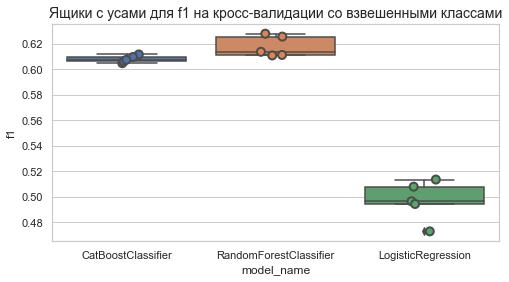

In [68]:
cv_df_balanced = cv_func(models_balanced, x_train, y_train, 'со взвешенными классами', 'balanced')

In [69]:
cv_df_balanced

,f1_balanced
model_name,
RandomForestClassifier,0.6139
CatBoostClassifier,0.6076
LogisticRegression,0.4964


Посмотрим как поведут себя модели на валидационой выборке:

CatBoostClassifier со взвешенными классами:
	 - f1 = 0.5893
	 - AUC-ROC = 0.8728
	 - accuracy = 0.7976


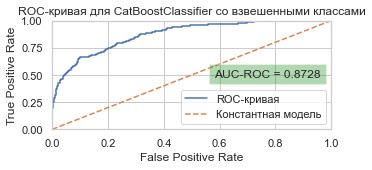

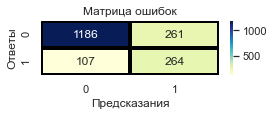

RandomForestClassifier со взвешенными классами:
	 - f1 = 0.6046
	 - AUC-ROC = 0.8655
	 - accuracy = 0.8388


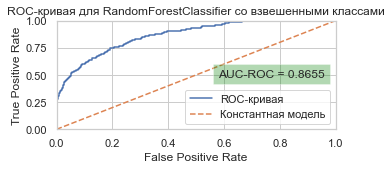

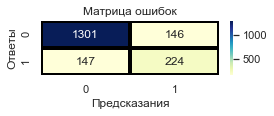

LogisticRegression со взвешенными классами:
	 - f1 = 0.4971
	 - AUC-ROC = 0.7613
	 - accuracy = 0.7107


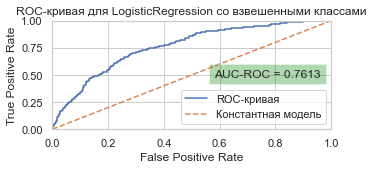

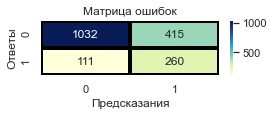

In [70]:
for model in models_balanced:
    model.fit(x_train_research, y_train_research)
    roc_cm_plot(model, x_valid_research, y_valid_research, 'со взвешенными классами')

Добавим результаты в общую таблицу:

In [71]:
for model in models_balanced:
    model.fit(x_train_research, y_train_research)
    results = model_result(model, 'weighted', x_valid_research, y_valid_research)
results

,model,comment,f1,AUC-ROC,accuracy
0,RandomForestClassifier,дисбаланс,0.5628,0.8657,0.8641
1,LogisticRegression,дисбаланс,0.2828,0.7578,0.8047
2,CatBoostClassifier,дисбаланс,0.5790,0.8713,0.8608
3,CatBoostClassifier,nearmiss,0.4573,0.7455,0.6502
4,RandomForestClassifier,nearmiss,0.4406,0.7267,0.6480
5,LogisticRegression,nearmiss,0.4330,0.6925,0.6370
6,CatBoostClassifier,smote,0.6303,0.8627,0.8508
7,RandomForestClassifier,smote,0.5981,0.8540,0.8246
8,LogisticRegression,smote,0.4825,0.7553,0.7146
9,CatBoostClassifier,weighted,0.5893,0.8728,0.7976


**Вывод:**

Видим увеличение метрики f1 для RandomForestClassifier: преодолели порог 0.60

### Порог классификации

Попробуем изменить значение порога классификации и посмотрим, как изменится f1

Напишем функцию `count_threshold` для автоматизации подсчета f1 при разном значении порога

In [72]:
def count_threshold (model, x, y):
    f1_list = []
    threshold_list = np.arange(0, 0.8, 0.01)
    f1_best = 0
    threshold_best = 0
    y_prob = model.predict_proba(x)
    y_prob_one = y_prob[:, 1]
    for threshold in threshold_list:
        y_pred = y_prob_one > threshold
        f1 = f1_score(y, y_pred)
        f1_list.append(f1)
        if threshold == 0.5:
            print('Порог = {:.2f} | f1 = {:.4f}'.format(threshold, f1))
        if f1 > f1_best:
            f1_best = f1
            threshold_best = threshold
    print('Порог = {:.2f} | f1_best = {:.4f}'.format(threshold_best, f1_best))
    plt.figure(figsize=(8,4))
    plt.plot(threshold_list, f1_list, linestyle='-')
    plt.ylim([0.2, 0.7])
    plt.xlim([0, 0.8])
    plt.xlabel('Порог')
    plt.ylabel('f1')
    plt.title('Влияние порога на f1 для {}'.format(model.__class__.__name__))
    plt.axvline(linewidth=4, color='r', linestyle = '--', x=threshold_best, ymin=0, ymax=1)
    plt.text(0.5, 0.24, 'f1_best = {:.4f}'.format(f1_best), 
             bbox={'facecolor': 'green', 'alpha': 0.3, 'pad': 5})
    plt.show()

Посмотрим на влияние порога на f1-метрику

In [73]:
rfc_threshold = RandomForestClassifier(
    random_state=rnd_st, 
    max_depth=10, 
    n_estimators=800
)
cbc_threshold = CatBoostClassifier(
    random_state=rnd_st, 
    silent=True, 
    depth=7, 
    learning_rate=0.3, 
    iterations=63
)

models_threshold = [rfc_threshold, cbc_threshold]

Порог = 0.50 | f1 = 0.5628
Порог = 0.31 | f1_best = 0.6141


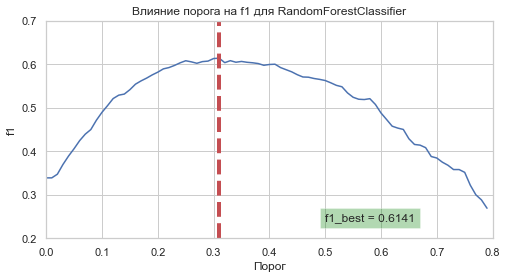

Порог = 0.50 | f1 = 0.5790
Порог = 0.38 | f1_best = 0.6167


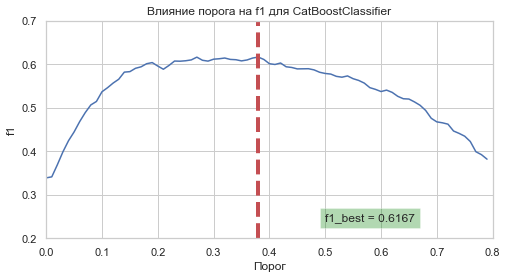

In [74]:
for model in models_threshold:
    model.fit(x_train_research, y_train_research)
    count_threshold(model, x_valid_research, y_valid_research)

- При пороге = 0.31 имеем максимальный f1_best = 0.6141 на валидационной выборке для RandomForestClassifier
- При пороге = 0.38 имеем максимальный f1_best = 0.6167 на валидационной выборке для CatBoostClassifier

Посмотрим на результат с найденными порогами на валидационной выборке:

In [75]:
rfc_threshold.fit(x_train_research, y_train_research)
threshold = 0.31
y_pred = np.where(rfc_threshold.predict_proba(x_valid_research)[:,1] > threshold, 1, 0)
f1 = f1_score(y_valid_research, y_pred)
accuracy = accuracy_score(y_valid_research, y_pred)
print('{} порог={} f1={:.4f}'.format(rfc_threshold.__class__.__name__, threshold, f1))
results.loc[len(results)] = [rfc_threshold.__class__.__name__, 'порог={}'.format(threshold), f1, '-', accuracy]

RandomForestClassifier порог=0.31 f1=0.6141


In [76]:
cbc_threshold.fit(x_train_research, y_train_research)
threshold = 0.38
y_pred = np.where(cbc_threshold.predict_proba(x_valid_research)[:,1] > threshold, 1, 0)
f1 = f1_score(y_valid_research, y_pred)
accuracy = accuracy_score(y_valid_research, y_pred)
print('{} порог={} f1={:.4f}'.format(cbc_threshold.__class__.__name__, threshold, f1))
results.loc[len(results)] = [cbc_threshold.__class__.__name__, 'порог={}'.format(threshold), f1, '-', accuracy]

CatBoostClassifier порог=0.38 f1=0.6167


In [77]:
results

,model,comment,f1,AUC-ROC,accuracy
0,RandomForestClassifier,дисбаланс,0.5628,0.8657,0.8641
1,LogisticRegression,дисбаланс,0.2828,0.7578,0.8047
2,CatBoostClassifier,дисбаланс,0.5790,0.8713,0.8608
3,CatBoostClassifier,nearmiss,0.4573,0.7455,0.6502
4,RandomForestClassifier,nearmiss,0.4406,0.7267,0.6480
5,LogisticRegression,nearmiss,0.4330,0.6925,0.6370
6,CatBoostClassifier,smote,0.6303,0.8627,0.8508
7,RandomForestClassifier,smote,0.5981,0.8540,0.8246
8,LogisticRegression,smote,0.4825,0.7553,0.7146
9,CatBoostClassifier,weighted,0.5893,0.8728,0.7976


#### Посмотрим на пороги классификации в кросс-валидации

На примере RandomForestClassifier

In [78]:
def count_threshold_cv(model, X, Y):
    model_name = model.__class__.__name__
    fold_num=1
    f1_best_list = []
    threshold_best_list = []
    kf = KFold(n_splits=5)
    print('Влияние порога на accuracy для {}'.format(model_name))
    for train_index, test_index in kf.split(X):
        print('fold_num =', fold_num)
        X_train, X_test, Y_train, Y_test = (X.iloc[train_index], 
                                            X.iloc[test_index], 
                                            Y.iloc[train_index], 
                                            Y.iloc[test_index])
        model.fit(X_train, Y_train)
        f1_list = []
        threshold_list = np.arange(0, 0.8, 0.01)
        f1_best = 0
        threshold_best = 0
        Y_prob = model.predict_proba(X_test)
        Y_prob_one = Y_prob[:, 1]
        for threshold in threshold_list:
            Y_pred = Y_prob_one > threshold
            f1 = f1_score(Y_test, Y_pred)
            f1_list.append(f1)
            if threshold == 0.5:
                print('Порог = {:.2f} | f1 = {:.4f}'.format(threshold, f1))
            if f1 > f1_best:
                f1_best = f1
                threshold_best = threshold
        print('Порог = {:.2f} | f1_best = {:.4f}'.format(threshold_best, f1_best))
        plt.figure(figsize=(4, 1.5))
        plt.plot(threshold_list, f1_list, linestyle='-')
        plt.ylim([0.2, 0.9])
        plt.xlim([0, 0.8])
        plt.xlabel('Порог')
        plt.ylabel('accuracy')
        plt.axvline(linewidth=4, color='r', linestyle = '--', x=threshold_best, ymin=0, ymax=1)
        plt.show()
        fold_num += 1
        f1_best_list.append(round(f1_best, 4))
        threshold_best_list.append(threshold_best)
    print('Значения f1_best за все итерации:', f1_best_list)
    print('Значения threshold_best за все итерации:', threshold_best_list)

Влияние порога на accuracy для RandomForestClassifier
fold_num = 1
Порог = 0.50 | f1 = 0.5439
Порог = 0.30 | f1_best = 0.6236


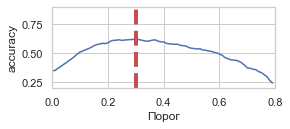

fold_num = 2
Порог = 0.50 | f1 = 0.5743
Порог = 0.30 | f1_best = 0.6224


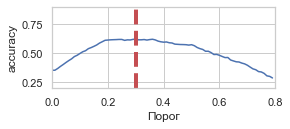

fold_num = 3
Порог = 0.50 | f1 = 0.5912
Порог = 0.40 | f1_best = 0.6329


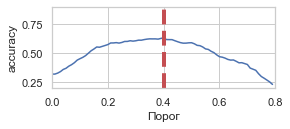

fold_num = 4
Порог = 0.50 | f1 = 0.6095
Порог = 0.33 | f1_best = 0.6355


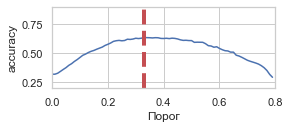

fold_num = 5
Порог = 0.50 | f1 = 0.5415
Порог = 0.28 | f1_best = 0.6190


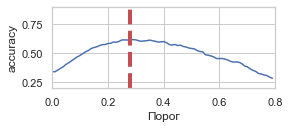

Значения f1_best за все итерации: [0.6236, 0.6224, 0.6329, 0.6355, 0.619]
Значения threshold_best за все итерации: [0.3, 0.3, 0.4, 0.33, 0.28]


In [79]:
rfc_threshold = RandomForestClassifier(
    random_state=rnd_st, 
    max_depth=10, 
    n_estimators=800
)
count_threshold_cv(rfc_threshold, x_train, y_train)

Видим, что за кросс-валидацию значения лучшего порога и соответственно лучшей метрики варируются

**Вывод:**

Изменение порогов классификации дает хороший прирост метрике f1: результаты выше 0.61:
- RandomForestClassifier порог=0.31 f1=0.6141
- CatBoostClassifier порог=0.38 f1=0.6167


### Выбор лучшей модели

Выведем результаты по кросс-валидации c 5 фолдами на обучающей выборке

In [80]:
results.sort_values(by='f1', ascending=False)

,model,comment,f1,AUC-ROC,accuracy
6,CatBoostClassifier,smote,0.6303,0.8627,0.8508
13,CatBoostClassifier,порог=0.38,0.6167,-,0.8564
12,RandomForestClassifier,порог=0.31,0.6141,-,0.8438
10,RandomForestClassifier,weighted,0.6046,0.8655,0.8388
7,RandomForestClassifier,smote,0.5981,0.8540,0.8246
9,CatBoostClassifier,weighted,0.5893,0.8728,0.7976
2,CatBoostClassifier,дисбаланс,0.5790,0.8713,0.8608
0,RandomForestClassifier,дисбаланс,0.5628,0.8657,0.8641
11,LogisticRegression,weighted,0.4971,0.7613,0.7107
8,LogisticRegression,smote,0.4825,0.7553,0.7146


**Вывод:**
    
Наибольшее значение метрики f1 было получено при оверсемплинге для CatBoostClassifier f1 = 0.6303

## Тестирование лучшей модели на тестовых данных

Посмотрим на первые 2 места в рейтинге

### 1 место: CatBoostClassifier с SMOTE

In [81]:
the_best_model_1 = CatBoostClassifier(
    random_state=rnd_st, 
    depth=7, 
    learning_rate=0.3, 
    iterations=63,
    silent=True
)

In [82]:
oversample = SMOTE(random_state=rnd_st)
x_train_smote, y_train_smote = oversample.fit_resample(x_train, y_train)
the_best_model_1.fit(x_train_smote, y_train_smote)
y_pred = the_best_model_1.predict(x_test)
y_prob = the_best_model_1.predict_proba(x_test)
y_prob_one = y_prob[:, 1]
accuracy = accuracy_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_prob_one)
f1 = f1_score(y_test, y_pred)
print('Модель 1 место {} f1 = {:.4f} | auc_roc = {:.4f}'.format(the_best_model_1.__class__.__name__, f1, auc_roc))

Модель 1 место CatBoostClassifier f1 = 0.6291 | auc_roc = 0.8650


In [83]:
print(x_train_smote.shape, y_train_smote.shape)
print(sum(y_train_smote == True), sum(y_train_smote == False))

(11578, 11) (11578,)
5789 5789


### 2 место RandomForestClassifier с порогом 0.31

In [84]:
the_best_model_2 = RandomForestClassifier(
    random_state=rnd_st, 
    max_depth=10, 
    n_estimators=800
)

In [86]:
the_best_model_2.fit(x_train, y_train)
threshold = 0.31
y_pred = np.where(the_best_model_2.predict_proba(x_test)[:,1] > threshold, 1, 0)
f1 = f1_score(y_test, y_pred)
print('Модель 2 место {} порог={} f1={:.4f}'.format(the_best_model_2.__class__.__name__, threshold, f1))

Модель 2 место RandomForestClassifier порог=0.31 f1=0.6327


**Вывод:**

- Модель 1 место CatBoostClassifier f1 = 0.6291| auc_roc = 0.8650
- Модель 2 место RandomForestClassifier порог=0.31 f1=0.6327

## Вывод


- Ознакомились с данными и подготовили их к исследованию (преобразовали категориальные признаки в численные с помощью техники прямого кодирования One-Hot Encoding и с помощью словаря).
- Исследовали баланс классов - они оказались несбалансированы, изучили модели без учёта дисбаланса, выяснили, что результат работы модели CatBoostClassifier лучше.
- Применили 4 способа борбы с дисбалансом - параметр class_weight, уменьшение выборки, увеличение выборки и изменение порога. Лучшие результаты показал метод борьбы с дисбалансом SMOTE.
- Достигли значения f1 = 0.61.